In [814]:
# Import Your code
from byscratch.linear_algebra import Vector, Matrix
from byscratch.linear_algebra import make_matrix
from byscratch.linear_algebra import sum_of_squares
from byscratch.linear_algebra import dot
from byscratch.linear_algebra import subtract
from byscratch.linear_algebra import magnitude
from byscratch.linear_algebra import scalar_multiply
from byscratch.linear_algebra import vector_mean
from byscratch.linear_algebra import distance
from byscratch.linear_algebra import add

from byscratch.statistics import correlation
from byscratch.statistics import standard_deviation
from byscratch.statistics import median
from byscratch.statistics import mean
from byscratch.statistics import de_mean
from byscratch.statistics import standard_deviation



from byscratch.gradient_descent import gradient_step

from byscratch.probability import inverse_normal_cdf

from byscratch.working_with_data import rescale


# python library imports
import random, datetime, re, csv, math, enum
from collections import defaultdict, Counter, OrderedDict
from typing import Tuple, List, NamedTuple, Optional, Callable
from typing import TypeVar, List, Iterator

# external code
from dateutil.parser import parse
import tqdm

# pyplot configs
import seaborn as sns
from matplotlib import pyplot as plt

# font
plt.rcParams.update({'font.size': 8})

# reset the default figsize value
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

# 144 is good for a high-resolution display. Try 100 if it's too big
plt.rcParams["figure.dpi"] = (80)

import pandas as pd

df = pd.read_csv('/Users/nickcrites/Desktop/byscratch/Data/bike_sharing_daily.csv')

In [815]:
df.shape

(731, 16)

In [816]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [817]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [818]:
#remove dteday and replace with day
for i,date in enumerate(df['dteday']):
    df['dteday'][i] = i
df


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [819]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [820]:
from collections import Counter

data_dict = csv.DictReader(open('/Users/nickcrites/Desktop/byscratch/Data/bike_sharing_daily.csv'))


temp = []
atemp = []
hum = []
windspeed = []
casual_1 = []
reg = []
count = []
workingday = []
seasons = []
seasons_text = ['spring','summer','fall','winter']


for row in data_dict:
    tem = float(row["temp"])
    temp.append(tem)

    avgtemp = float(row["atemp"])
    atemp.append(avgtemp)

    humidity = float(row["hum"])
    hum.append(humidity)

    wndspd = float(row["windspeed"])
    windspeed.append(wndspd)

    cas = float(row["casual"])
    casual_1.append(cas)
    
    cnt = float(row['cnt'])
    count.append(cnt)
    
    wd = float(row['workingday'])
    workingday.append(wd)
    
    r = float(row['registered'])
    reg.append(r)
    
    season = int(row["season"]) - 1
    seasons.append(seasons_text[season])


In [821]:
print(f"The mean temperature is {mean(temp)}, median is {median(temp)}")

print(f"The mean humidity is {mean(hum)}, median is {median(hum)}")

print(f"The mean bike riders per day is {mean(count)}, median is {median(count)}")

The mean temperature is 0.49538478850889184, median is 0.498333
The mean humidity is 0.6278940629274962, median is 0.626667
The mean bike riders per day is 4504.3488372093025, median is 4548.0


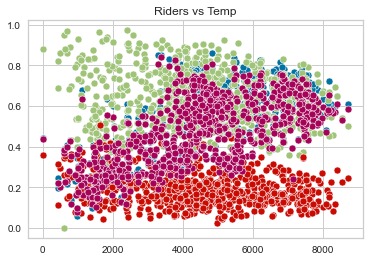

In [882]:
#plot users against weather data
sns.scatterplot(
     y=temp,
     x=count)
sns.scatterplot(
     y=hum,
     x=count)
sns.scatterplot(
     y=windspeed,
     x=count)
sns.scatterplot(
     y=atemp,
     x=count)



plt.title("Riders vs Temp")
plt.show()

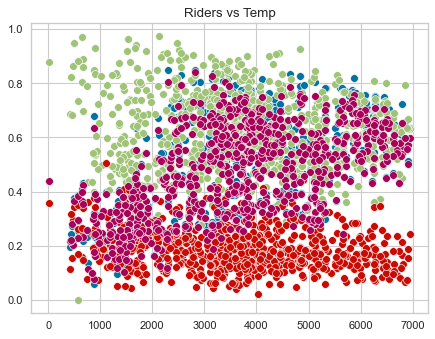

In [823]:
#plot users against weather data
sns.scatterplot(
     y=temp,
     x=reg)
sns.scatterplot(
     y=hum,
     x=reg)
sns.scatterplot(
     y=windspeed,
     x=reg)
sns.scatterplot(
     y=atemp,
     x=reg)



plt.title("Riders vs Temp")
plt.show()

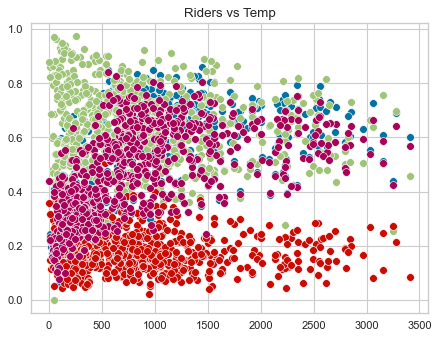

In [824]:
#plot users against weather data
sns.scatterplot(
     y=temp,
     x=casual_1)
sns.scatterplot(
     y=hum,
     x=casual_1)
sns.scatterplot(
     y=windspeed,
     x=casual_1)
sns.scatterplot(
     y=atemp,
     x=casual_1)



plt.title("Riders vs Temp")
plt.show()

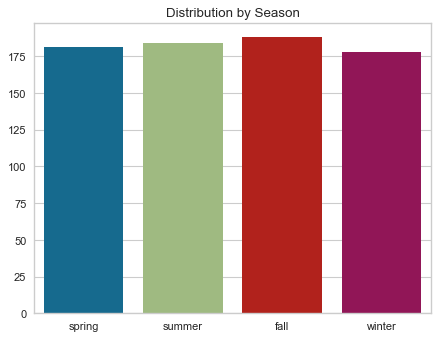

In [825]:
from collections import Counter
inc = Counter(seasons)

sns.barplot(
    y=list(inc.values()),
    x=list(inc.keys()))
    #orient='h')

plt.title("Distribution by Season")
plt.show()

In [826]:
df = df.drop(['casual','registered','instant','dteday'],axis = 1)

In [827]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,0.344167,0.363625,0.805833,0.160446,985
1,spring,0,jan,0,sun,0,moderate,0.363478,0.353739,0.696087,0.248539,801
2,spring,0,jan,0,mon,1,good,0.196364,0.189405,0.437273,0.248309,1349
3,spring,0,jan,0,tue,1,good,0.200000,0.212122,0.590435,0.160296,1562
4,spring,0,jan,0,wed,1,good,0.226957,0.229270,0.436957,0.186900,1600


<Figure size 1200x2400 with 0 Axes>

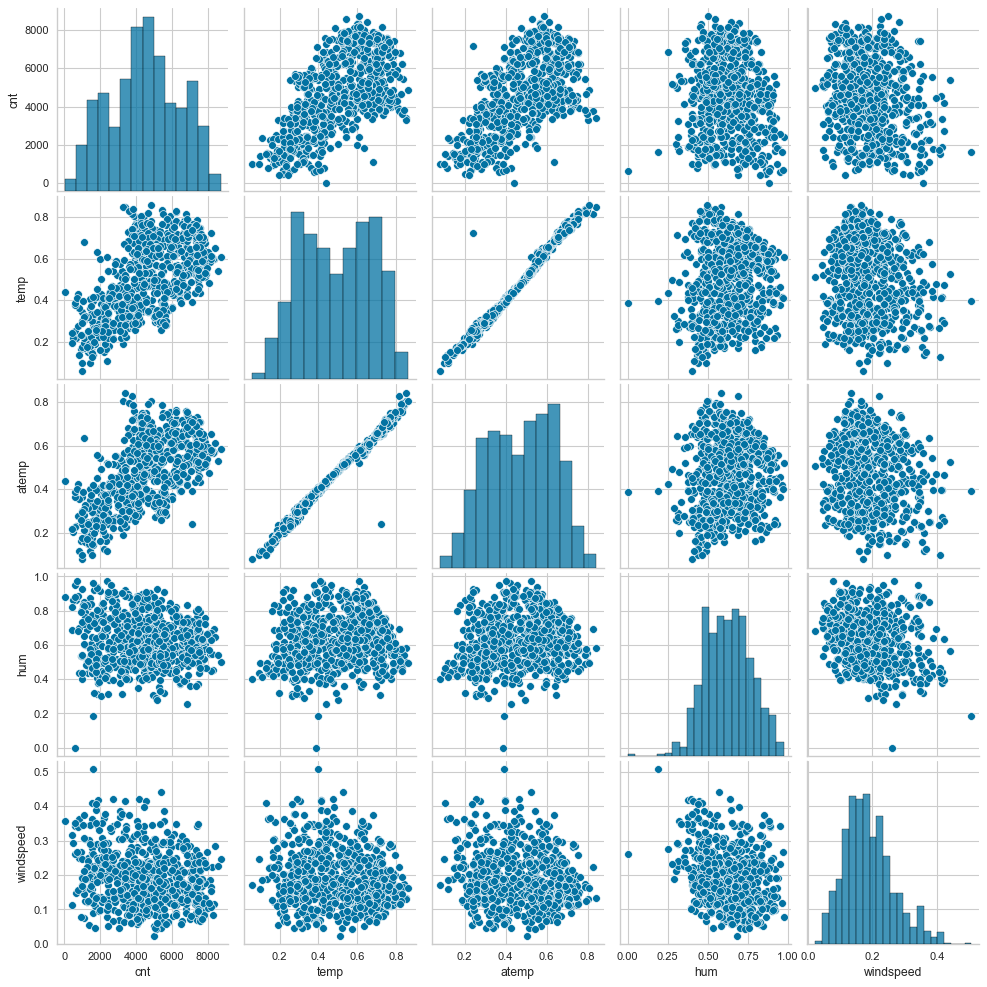

In [828]:
# Draw pair Plots to check the linear relationship
#Draw pairplots for continuous numeric variables using seaborn

plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

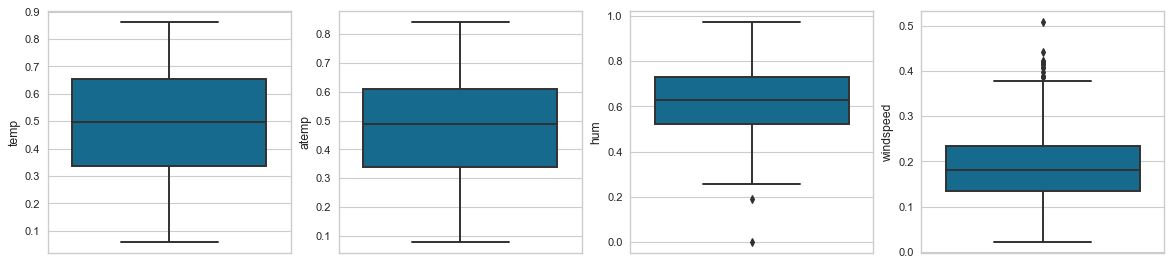

In [829]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

<Figure size 1600x1200 with 0 Axes>

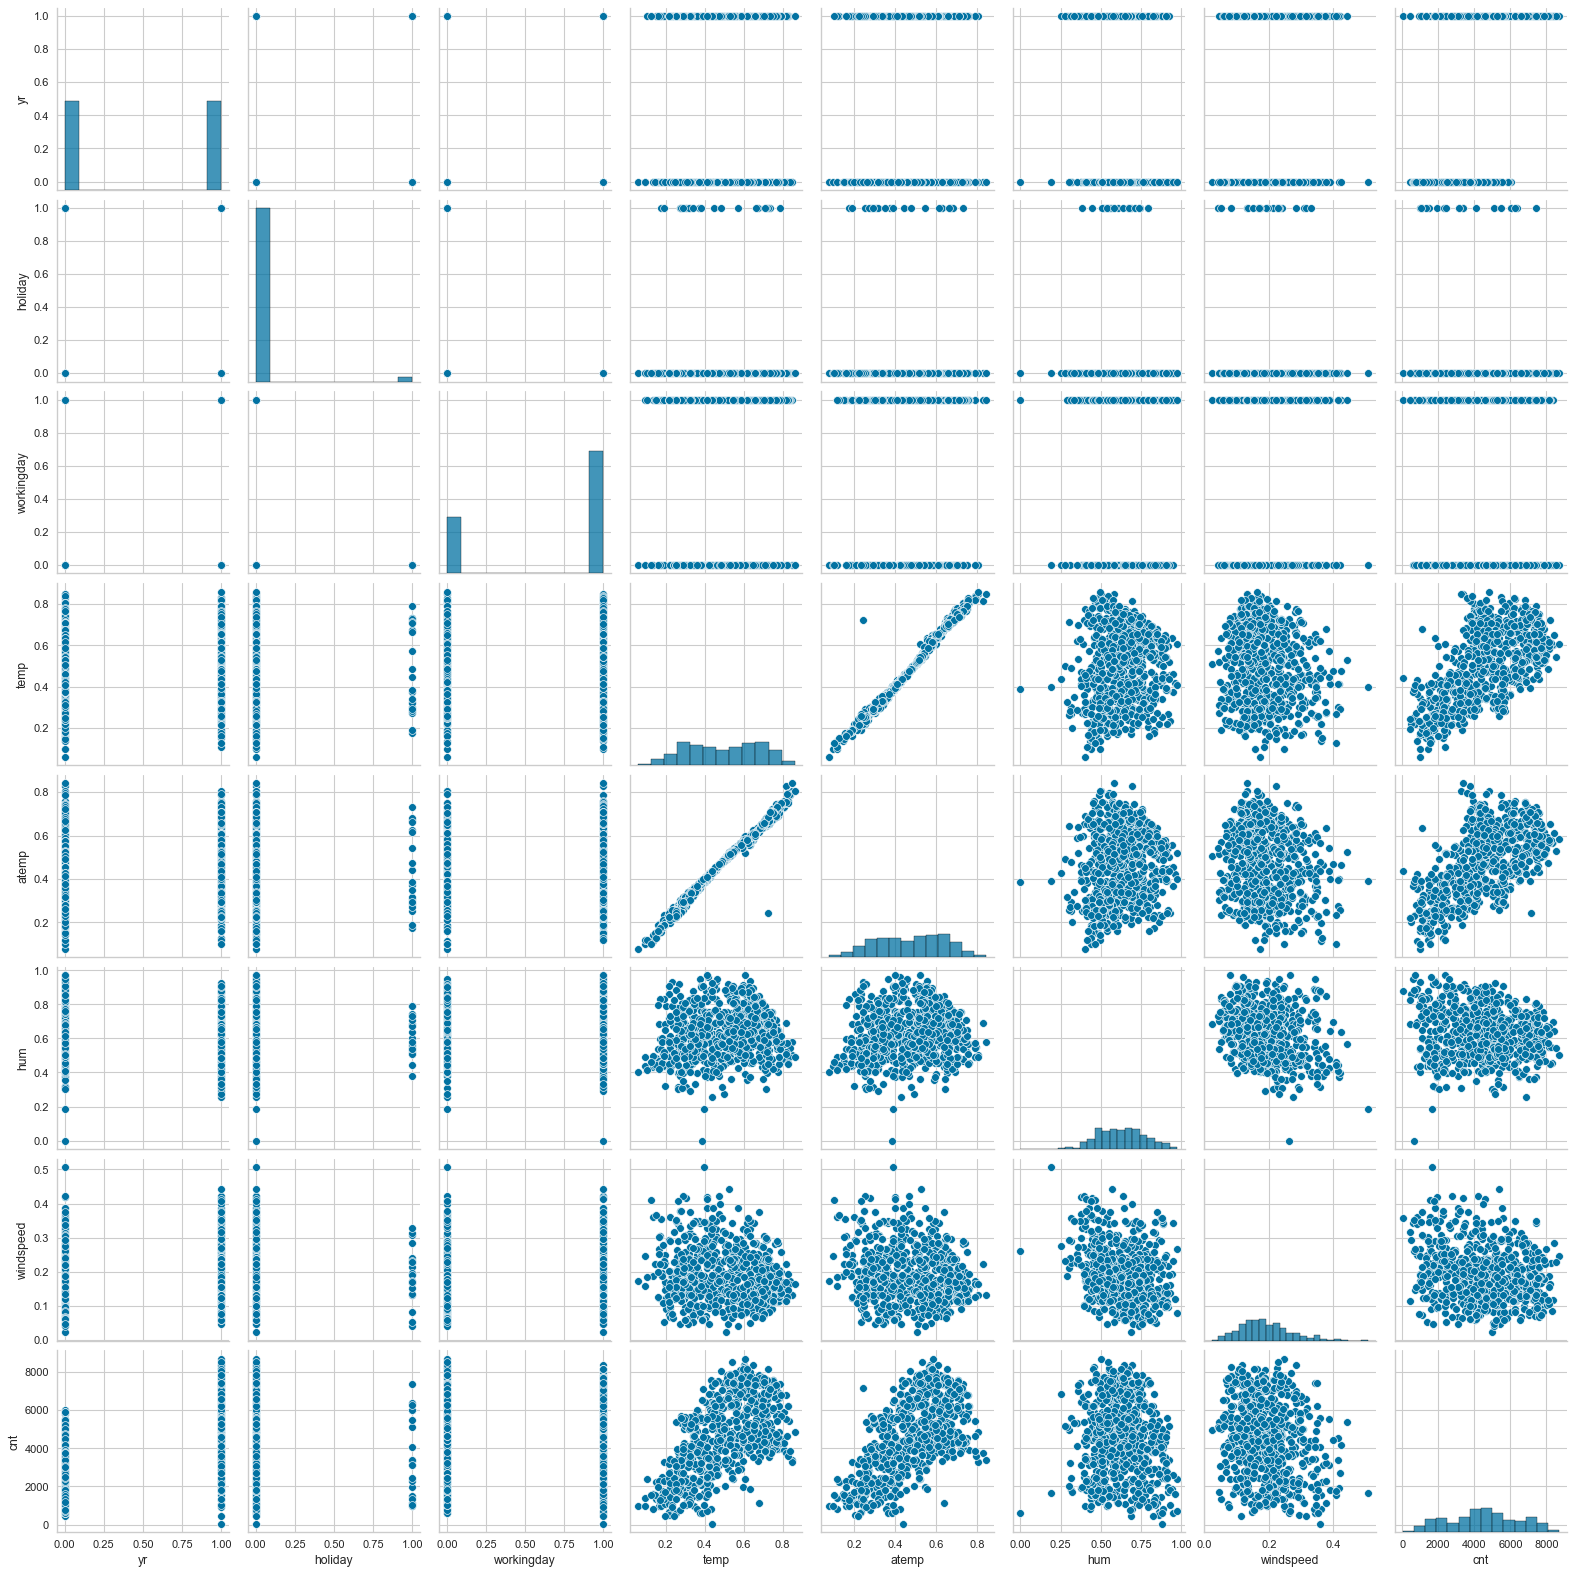

In [830]:
# Visualize the Data to Find the Correlation between the Numerical Variable
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

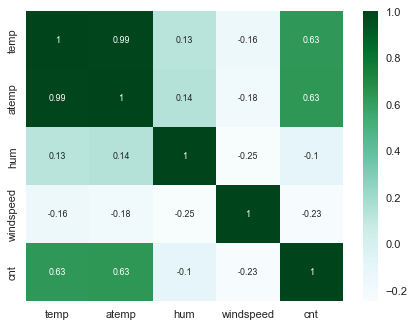

In [831]:
# Checking continuous variables relationship with each other
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

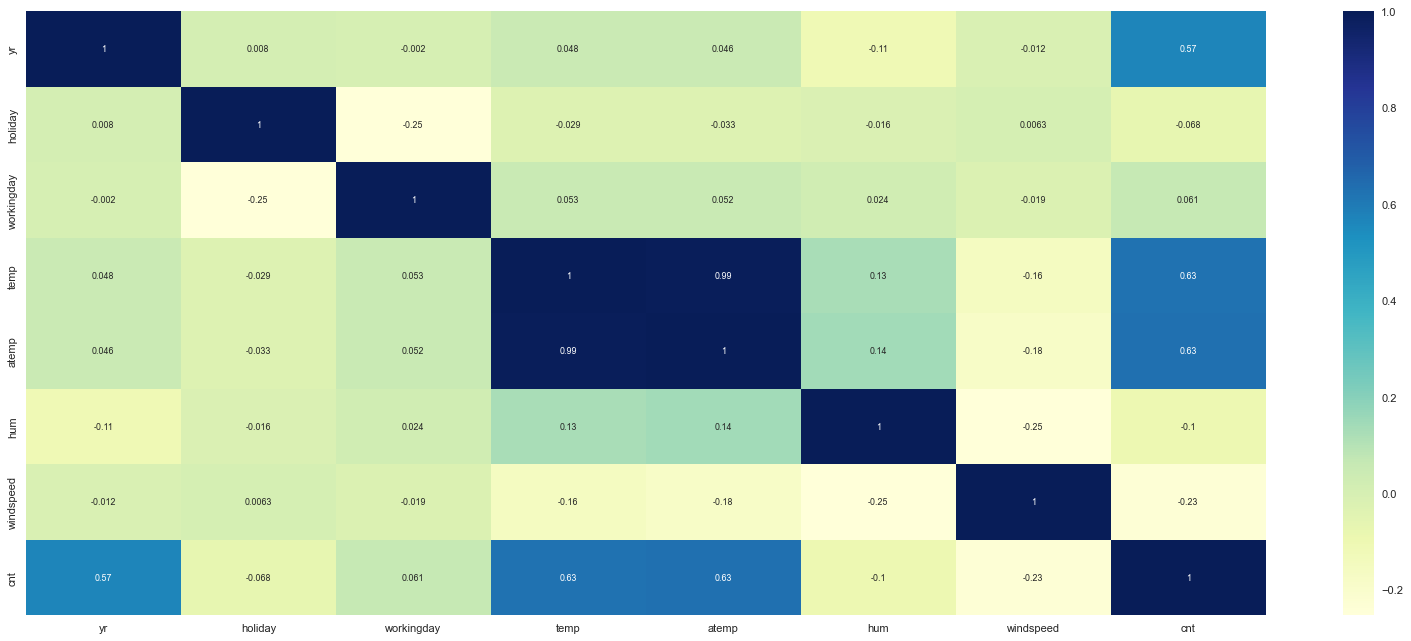

In [832]:
#Calculate Correlation
corr = df.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

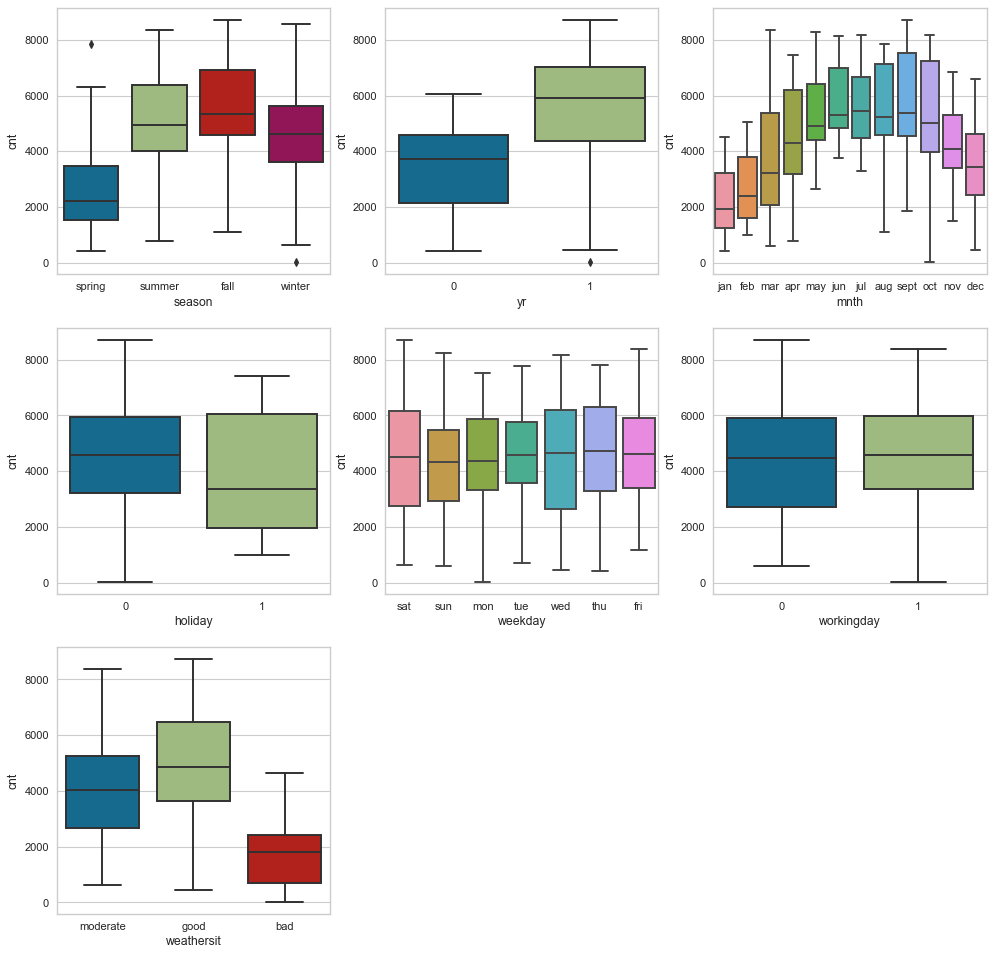

In [833]:
# Analysing Categorical Variables with target variables
# Boxplot for categorical variables to see demands

vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

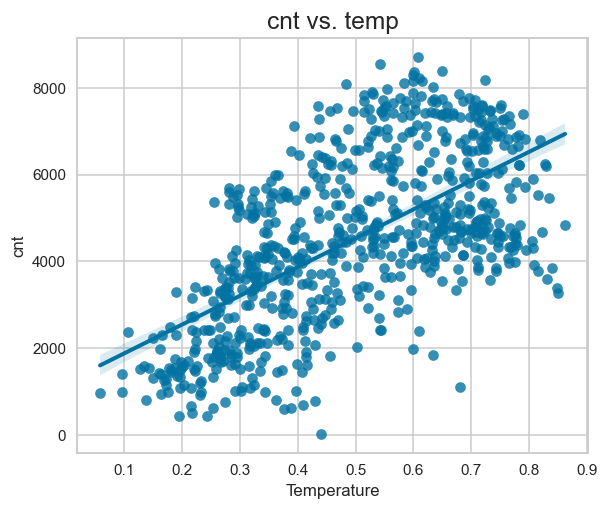

In [834]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("cnt vs. temp",fontsize=16)
sns.regplot(data=df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

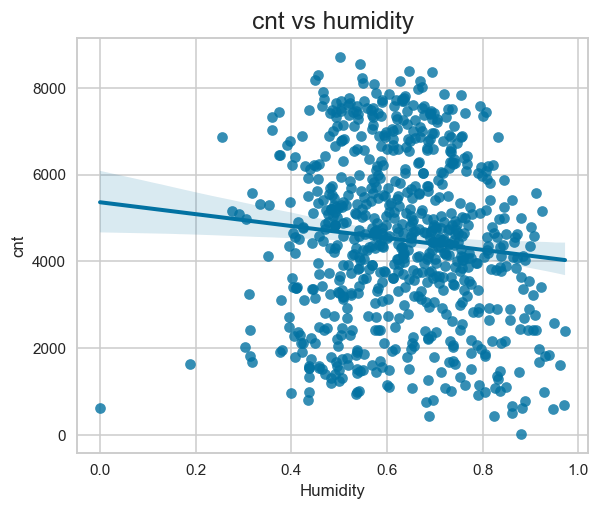

In [835]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("cnt vs humidity",fontsize=16)
sns.regplot(data=df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

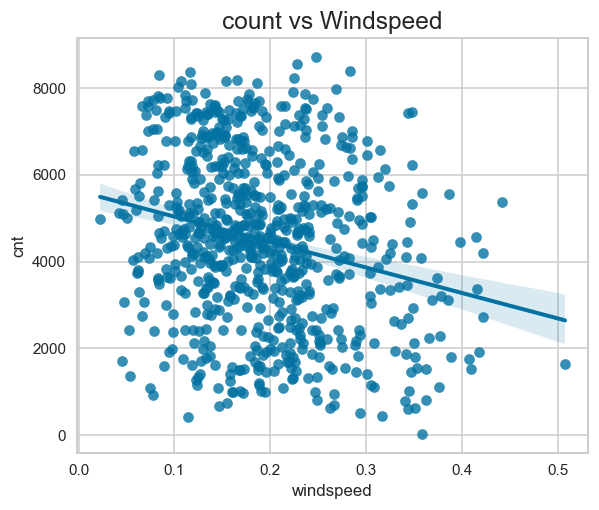

In [836]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("count vs Windspeed",fontsize=16)
sns.regplot(data=df,y="cnt",x="windspeed")
plt.show()

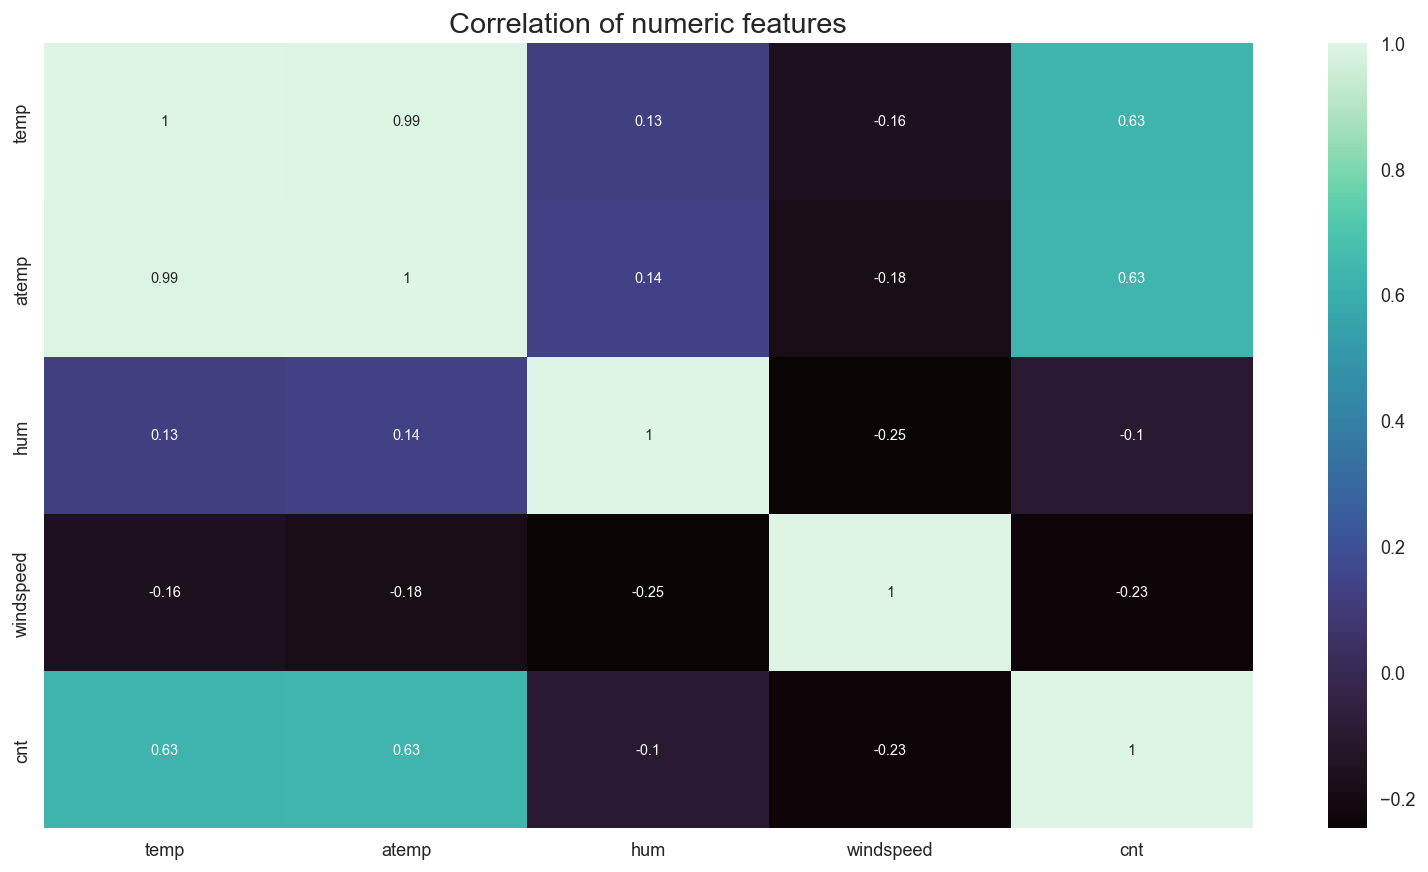

In [837]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(df[num_features].corr(),annot= True,cmap="mako")
plt.show()

In [838]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

#Print columns after creating dummies
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [839]:
# You'll need these
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import xgboost as xgb
warnings.filterwarnings('ignore')
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [840]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import math
from sklearn.metrics import mean_squared_error, accuracy_score

# Get a list of the animal classes to test the predictions (the TARGET)

#y to contain only target variable
y=df['cnt'].values

#X is all remain variable also our independent variables
X=df.drop(['cnt'],axis=1)

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [841]:
X

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,0.344167,0.363625,0.805833,0.160446,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0.363478,0.353739,0.696087,0.248539,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,0.254167,0.226642,0.652917,0.350133,1,0,0,...,0,0,0,0,1,0,0,0,0,1
727,1,0,1,0.253333,0.255046,0.590000,0.155471,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.253333,0.242400,0.752917,0.124383,1,0,0,...,0,0,1,0,0,0,0,0,0,1
729,1,0,0,0.255833,0.231700,0.483333,0.350754,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [842]:
df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,0.344167,0.363625,0.805833,0.160446,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1600,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,0.254167,0.226642,0.652917,0.350133,2114,1,0,...,0,0,0,0,1,0,0,0,0,1
727,1,0,1,0.253333,0.255046,0.590000,0.155471,3095,1,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.253333,0.242400,0.752917,0.124383,1341,1,0,...,0,0,1,0,0,0,0,0,0,1
729,1,0,0,0.255833,0.231700,0.483333,0.350754,1796,1,0,...,0,0,0,1,0,0,0,0,1,0


In [843]:
# Let us scale continuous variables
num_vars = ['temp','yr','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

In [844]:
#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [845]:
# Build a Model using RFE and Automated approach
# Use RFE to eliminate some columns
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [846]:
#Cut down number of features to 15 using automated approach
# from sklearn.svm import SVR

estimator = LinearRegression()
rfe = RFE(estimator,n_features_to_select=15, step=1)
rfe = rfe.fit(X_train,y_train)

#Columns selected by RFE and their weights
rfe_list = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
print(rfe_list)



[('yr', True, 1), ('holiday', True, 1), ('workingday', True, 1), ('temp', False, 6), ('atemp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('season_spring', True, 1), ('season_summer', False, 16), ('season_winter', True, 1), ('mnth_aug', False, 7), ('mnth_dec', False, 4), ('mnth_feb', False, 14), ('mnth_jan', False, 11), ('mnth_jul', True, 1), ('mnth_jun', False, 15), ('mnth_mar', False, 2), ('mnth_may', False, 5), ('mnth_nov', False, 3), ('mnth_oct', False, 8), ('mnth_sept', True, 1), ('weekday_mon', False, 9), ('weekday_sat', True, 1), ('weekday_sun', True, 1), ('weekday_thu', False, 12), ('weekday_tue', False, 10), ('weekday_wed', False, 13), ('weathersit_bad', True, 1), ('weathersit_good', True, 1), ('weathersit_moderate', True, 1)]


In [847]:
# Manual elimination funcitons
# build a model using statsmodel api

def build_model(cols):
  """
  Build a model using statsmodel api
  Takes the columns to be selected for model as a parameter
  """
  X_train_sm = sm.add_constant(X_train[cols])
  lm = sm.OLS(y_train, X_train_sm).fit()
  print(lm.summary())
  return lm

# calculate VIFs and print them; measure of feature collinearity
# Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
  """
    Calculate VIFs and print them
    Takes the columns for which VIF to be calcualted as a parameter
  """
  df1 = X_train[cols]
  vif = pd.DataFrame()
  vif['Features'] = df1.columns
  vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
  vif['VIF'] = round(vif['VIF'],2)
  print(vif.sort_values(by='VIF',ascending=False))

In [848]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [849]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['temp', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [850]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr','holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [851]:
X_train_rfe.shape

(511, 15)

In [852]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr','holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     161.7
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.05e-179
Time:                        16:42:02   Log-Likelihood:                -4131.5
No. Observations:                 511   AIC:                             8295.
Df Residuals:                     495   BIC:                             8363.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2128.7733    

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

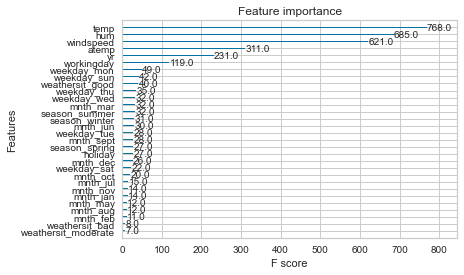

In [853]:
##XGBoost Regression Analysis on RF
mod = xgb.XGBRegressor()
mod.fit(X_train, y_train)
predictions = mod.predict(X_test)
xgb.plot_importance(mod)





In [854]:
##Accuracy
#root mean square error
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print("score: {0:,.0f}".format(rmse))





score: 646


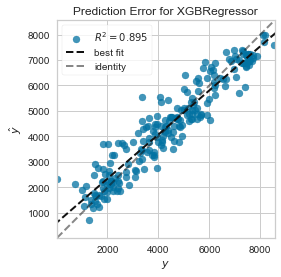

<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [855]:
from xgboost import XGBRegressor

# Instantiate the linear model and visualizer
model = XGBRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [856]:
import plotly.express as px
#df = px.data.iris()
#fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
#               color='species')

fig = px.scatter_3d(x=temp, y=hum, z=windspeed, color=seasons, symbol=seasons, size=count,title = "temp, humidity, wind by season")
fig.show()

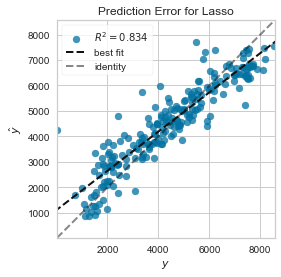

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [857]:
from sklearn.linear_model import Lasso
# from sklearn.model_selection import train_test_split

# from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [858]:
##Decision Tree
decisionTree = DecisionTreeRegressor()
decisionTree.fit(X_train, y_train)

decisionTree.score(X_train,y_train), decisionTree.score(X_test,y_test)

(1.0, 0.8068876691095512)

In [859]:
from sklearn import tree

#tree.plot_tree(decisionTree)
#slows down my computer

In [860]:
decisionTree.feature_importances_

array([2.62006218e-01, 2.73358079e-03, 2.72614038e-03, 5.07598003e-01,
       2.48572283e-02, 7.44238759e-02, 3.47161166e-02, 1.72593115e-02,
       7.70589134e-04, 2.71777257e-02, 4.37012263e-04, 1.85269396e-04,
       4.36385947e-05, 1.78380449e-03, 0.00000000e+00, 9.76703293e-05,
       3.28484637e-03, 2.09667202e-04, 1.28019678e-06, 1.96476126e-03,
       8.07986724e-03, 2.39145238e-03, 3.52958787e-03, 3.46034972e-03,
       8.48249186e-03, 1.61461514e-03, 1.46193551e-03, 5.60192529e-06,
       4.23046581e-03, 4.46689261e-03])

In [861]:
decisionTree.score(X_train,y_train), decisionTree.score(X_test,y_test)


(1.0, 0.8068876691095512)

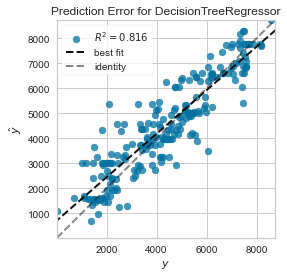

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [862]:
from sklearn.linear_model import Lasso
# from sklearn.model_selection import train_test_split

# from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
model = tree.DecisionTreeRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [863]:
feat_importance= {}
for i, value in enumerate(decisionTree.feature_importances_):
    feat_importance[X_train.columns[i]] = value
feat_importance

{'yr': 0.26200621846436806,
 'holiday': 0.0027335807907317815,
 'workingday': 0.002726140378913464,
 'temp': 0.5075980031677902,
 'atemp': 0.024857228261091845,
 'hum': 0.07442387592768947,
 'windspeed': 0.03471611658416813,
 'season_spring': 0.017259311462018985,
 'season_summer': 0.000770589133894217,
 'season_winter': 0.027177725665219768,
 'mnth_aug': 0.00043701226334163856,
 'mnth_dec': 0.00018526939631872258,
 'mnth_feb': 4.363859467535409e-05,
 'mnth_jan': 0.001783804488595001,
 'mnth_jul': 0.0,
 'mnth_jun': 9.767032930389831e-05,
 'mnth_mar': 0.0032848463716408237,
 'mnth_may': 0.0002096672016076364,
 'mnth_nov': 1.2801967828160798e-06,
 'mnth_oct': 0.001964761262779283,
 'mnth_sept': 0.008079867241538618,
 'weekday_mon': 0.0023914523757458503,
 'weekday_sat': 0.0035295878692998303,
 'weekday_sun': 0.003460349719862096,
 'weekday_thu': 0.008482491864957541,
 'weekday_tue': 0.0016146151397697795,
 'weekday_wed': 0.0014619355084206694,
 'weathersit_bad': 5.6019252906242325e-06,
 

In [864]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(max_depth=42, random_state=0)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=42, random_state=0)

In [865]:
clf.score(X_train,y_train), clf.score(X_test,y_test)

(0.9786644344075455, 0.8805976648164429)

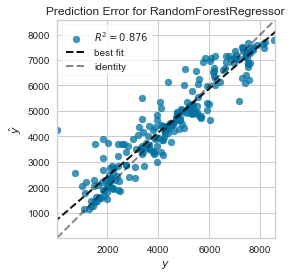

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [866]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the linear model and visualizer
model = RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [867]:
clf.feature_importances_

RF_feat_importance= {}
for i, value in enumerate(clf.feature_importances_):
    RF_feat_importance[X_train.columns[i]] = value
RF_feat_importance

{'yr': 0.25883711779912577,
 'holiday': 0.0025029966781538854,
 'workingday': 0.005079519263726752,
 'temp': 0.30799258440293203,
 'atemp': 0.2316647182904766,
 'hum': 0.05788096784827388,
 'windspeed': 0.03232259330892381,
 'season_spring': 0.017027528847043557,
 'season_summer': 0.0024084375202865953,
 'season_winter': 0.03444274395071372,
 'mnth_aug': 0.0009376383982128446,
 'mnth_dec': 0.003196498585158596,
 'mnth_feb': 0.002103963957060137,
 'mnth_jan': 0.001896439331105884,
 'mnth_jul': 0.0003436965748284362,
 'mnth_jun': 0.0011444269091965126,
 'mnth_mar': 0.0013764947797337951,
 'mnth_may': 0.0014712676286755136,
 'mnth_nov': 0.0008050184038917823,
 'mnth_oct': 0.002622699339561004,
 'mnth_sept': 0.004387462873385254,
 'weekday_mon': 0.002794317979578301,
 'weekday_sat': 0.0028476305437011864,
 'weekday_sun': 0.004712580884005855,
 'weekday_thu': 0.0024251778502779216,
 'weekday_tue': 0.0016356899966208638,
 'weekday_wed': 0.0015179408752835255,
 'weathersit_bad': 0.00546812524

In [868]:
df = df.drop(['cnt'],axis=1)

In [870]:
X

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,0.344167,0.363625,0.805833,0.160446,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0.363478,0.353739,0.696087,0.248539,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,0.254167,0.226642,0.652917,0.350133,1,0,0,...,0,0,0,0,1,0,0,0,0,1
727,1,0,1,0.253333,0.255046,0.590000,0.155471,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.253333,0.242400,0.752917,0.124383,1,0,0,...,0,0,1,0,0,0,0,0,0,1
729,1,0,0,0.255833,0.231700,0.483333,0.350754,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [871]:
####Using PCA#####
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
principalComponents = pca.fit_transform(X)
df_pca = pd.DataFrame(pca.fit_transform(X))

df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.827028,1.320405,0.417704,-0.415442,0.470535,0.069108,-0.104267,-0.632635,-0.031688,0.139004,-0.117227,-0.545982,-0.007627,-0.011991,0.104595,-0.357627,-0.338827,-0.068849
1,0.780690,1.313899,0.426970,-0.411367,0.457306,0.026038,0.022698,0.738295,0.033593,-0.151658,-0.103440,-0.497567,0.011111,-0.023578,0.134108,-0.371387,-0.325084,-0.039798
2,-0.376844,0.101922,1.171137,-0.056619,0.513968,-0.280704,0.884740,-0.077450,0.063439,0.036976,-0.137625,-0.484889,0.013368,-0.003084,0.127204,-0.275796,-0.411889,-0.057016
3,-0.337790,0.031719,1.182882,-0.040253,0.524198,-0.180468,-0.213764,0.207635,-0.089072,0.828459,-0.156017,-0.523471,-0.008479,-0.022871,0.126089,-0.258301,-0.426296,0.014396
4,-0.378196,0.021325,1.188166,-0.050136,0.524112,-0.208546,-0.298022,-0.063227,0.715355,-0.294200,-0.151594,-0.538406,-0.038128,-0.010962,0.110949,-0.295349,-0.433877,-0.057867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.998065,0.111279,0.837063,-0.004905,-0.529996,-0.117998,-0.226586,-0.046230,-0.703143,-0.495764,-0.421261,0.425232,-0.341509,-0.468014,-0.044548,0.050706,-0.144869,0.054178
727,0.978642,0.262066,0.752558,-0.034550,-0.534601,-0.105343,-0.022601,-0.000386,-0.020489,-0.030856,-0.424835,0.480072,-0.325894,-0.470337,-0.014305,0.048052,-0.146974,-0.153583
728,0.823070,1.270145,0.241484,-0.224108,-0.528717,-0.048460,-0.147370,-0.677032,-0.049362,0.113295,-0.428727,0.453288,-0.314927,-0.459292,-0.042791,0.061896,-0.149366,-0.023898
729,-0.609259,1.106807,0.394837,-0.089273,-0.489693,-0.242823,-0.026775,0.663079,0.019225,-0.138172,-0.422101,0.505267,-0.280686,-0.479023,-0.026793,0.136950,-0.212312,0.024868


In [872]:
#y to contain only target variable
y

#X is all remainign variable also our independent variables
X=df_pca

#Train Test split with 70:30 ratio
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

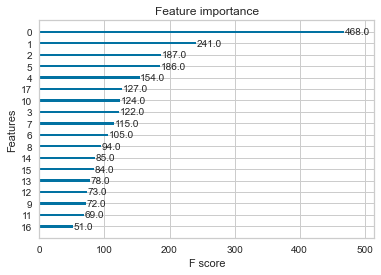

In [873]:
##XGBoost Regression Analysis on PCA
mod = xgb.XGBRegressor()
mod.fit(X_train1, y_train1)
predictions = mod.predict(X_test1)
predictions1 = [round(value) for value in predictions]
xgb.plot_importance(mod)


In [874]:
##Decision Tree for PCA
decisionTree = DecisionTreeRegressor()
decisionTree.fit(X_train1, y_train1)

decisionTree.score(X_train1,y_train1), decisionTree.score(X_test1,y_test1)

(1.0, 0.6083276486500659)

In [875]:
#KNN for regular Data
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train,y_train)
knn.score(X_train,y_train), knn.score(X_test,y_test)

(0.7444544743040227, 0.7291391332737467)

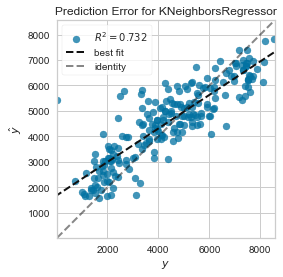

<AxesSubplot:title={'center':'Prediction Error for KNeighborsRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [876]:
##KNN For regular Data


# Instantiate the linear model and visualizer
model = KNeighborsRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [877]:
#KNN for PCA Data
from sklearn.neighbors import KNeighborsRegressor
knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(X_train1,y_train1)
knn1.score(X_train1,y_train1), knn1.score(X_test1,y_test1)

(1.0, 0.5017600440585759)

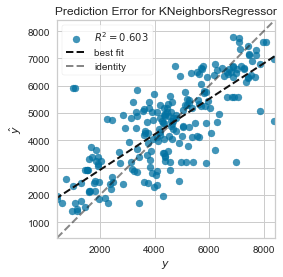

<AxesSubplot:title={'center':'Prediction Error for KNeighborsRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [878]:
## For PCA Data


# Instantiate the linear model and visualizer
model = KNeighborsRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
visualizer.show() 

In [879]:
#RandomForst on PCA
from sklearn.ensemble import RandomForestRegressor
clf1 = RandomForestRegressor(max_depth=2, random_state=0)
clf1.fit(X_train1, y_train1)

RandomForestRegressor(max_depth=2, random_state=0)

In [880]:
clf1.score(X_train1,y_train1), clf1.score(X_test1,y_test1)

(0.6601752988150383, 0.6214570248948292)

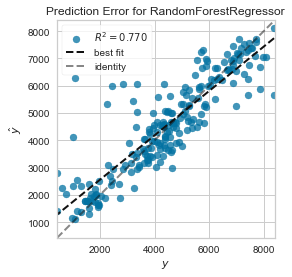

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [881]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the linear model and visualizer
model = RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
visualizer.show() 